In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaustubhdikshit/neu-surface-defect-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\kaustubhdikshit\neu-surface-defect-database\versions\1


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATASET_PATH="data/NEU-DET/train/images"

In [4]:
def load_data(dataset_path):
    """
    Quét thư mục, trích xuất nhãn, VÀ đọc ảnh để lấy kích thước.
    """
    data = [] # List để lưu các tuple (filepath, label, shape)
    try:
        if not os.path.isdir(dataset_path):
            print(f"LỖI: Không tìm thấy đường dẫn: {dataset_path}")
            return None
        
        print(f"Đang quét {dataset_path} (và đọc kích thước ảnh)...")
        class_names = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])
        
        if not class_names:
            print(f"LỖI: Không tìm thấy thư mục con nào trong {dataset_path}")
            return None
        
        for label in class_names:
            class_path = os.path.join(dataset_path, label)
            image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.bmp'))]
            
            for file_name in image_files:
                file_path = os.path.join(class_path, file_name)
                
                # --- PHẦN TỐI ƯU ---
                # Đọc ảnh để lấy shape ngay lập tức
                try:
                    img = cv2.imread(file_path)
                    if img is None:
                        print(f"Bỏ qua: Không thể đọc {file_path}")
                        continue
                    
                    # Thêm 'shape' vào dữ liệu
                    data.append((file_path, label, img.shape))
                except Exception as e:
                    print(f"Lỗi khi đọc file {file_path}: {e}")
                # ---------------------
                
        # Tạo DataFrame
        df = pd.DataFrame(data, columns=['filepath', 'label', 'shape'])
        print(f"Hoàn tất! Đã tải và quét {len(df)} ảnh vào DataFrame.")
        return df
        
    except Exception as e:
        print(f"Đã xảy ra lỗi: {e}")
        return None

In [5]:
df = load_data(DATASET_PATH)
df.info()
df['label'].value_counts().sort_index()
df.head()

Đang quét data/NEU-DET/train/images (và đọc kích thước ảnh)...
Hoàn tất! Đã tải và quét 1440 ảnh vào DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  1440 non-null   object
 1   label     1440 non-null   object
 2   shape     1440 non-null   object
dtypes: object(3)
memory usage: 33.9+ KB


,filepath,label,shape
0,data/NEU-DET/train/images\crazing\crazing_1.jpg,crazing,"(200, 200, 3)"
1,data/NEU-DET/train/images\crazing\crazing_10.jpg,crazing,"(200, 200, 3)"
2,data/NEU-DET/train/images\crazing\crazing_100.jpg,crazing,"(200, 200, 3)"
3,data/NEU-DET/train/images\crazing\crazing_101.jpg,crazing,"(200, 200, 3)"
4,data/NEU-DET/train/images\crazing\crazing_102.jpg,crazing,"(200, 200, 3)"


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26448\1899897836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts().values, palette="viridis")


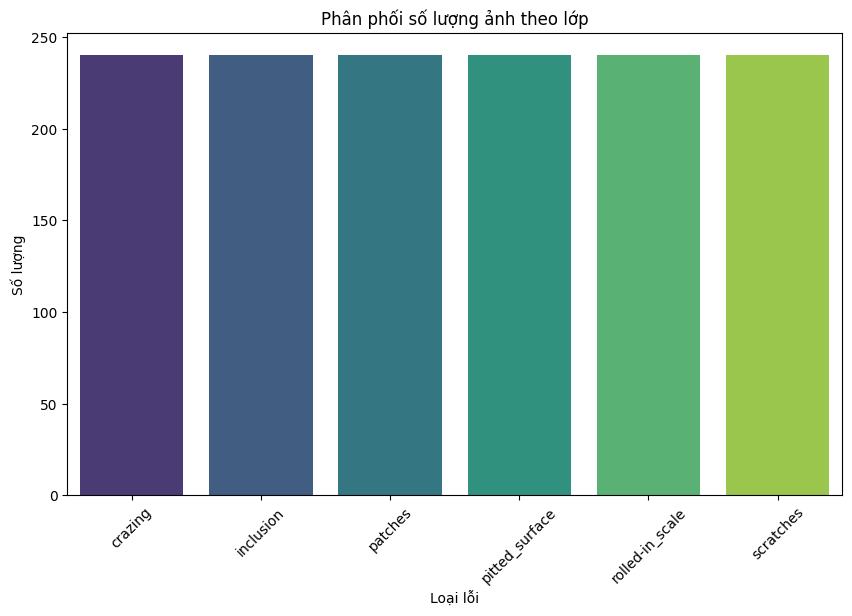

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts().values, palette="viridis")
plt.title("Phân phối số lượng ảnh theo lớp")
plt.xlabel("Loại lỗi")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()

In [7]:
print("\n--- Bước 3: Phân tích Kích thước (Từ DataFrame) ---")

# Lấy tất cả các giá trị 'shape' duy nhất
unique_shapes = df['shape'].unique()

if len(unique_shapes) == 1:
    print(f"Tất cả ảnh đều có cùng kích thước: {unique_shapes[0]}")
else:
    print(f"Tìm thấy các kích thước khác nhau: {unique_shapes}")
    print("-> Bạn sẽ CẦN resize ảnh trước khi trích xuất đặc trưng.")


--- Bước 3: Phân tích Kích thước (Từ DataFrame) ---
Tất cả ảnh đều có cùng kích thước: (200, 200, 3)


In [8]:
sample_df = df.groupby('label').first()
class_names = sample_df.index.tolist()
sample_paths = sample_df['filepath'].tolist()

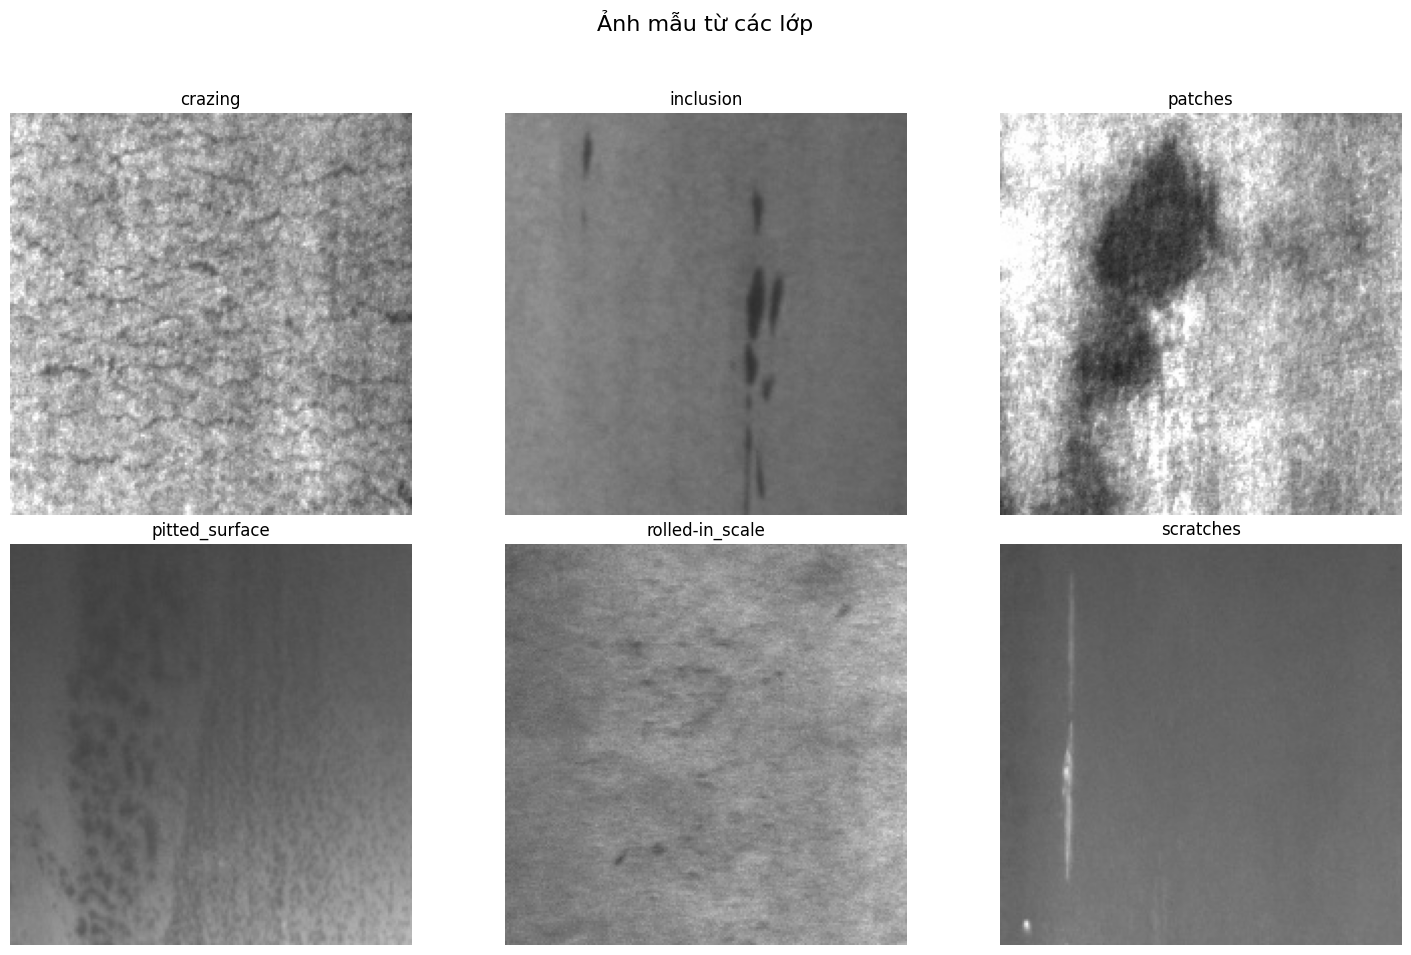

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle("Ảnh mẫu từ các lớp", fontsize=16)
for i, (label, path) in enumerate(zip(class_names, sample_paths)):
    img_rgb = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

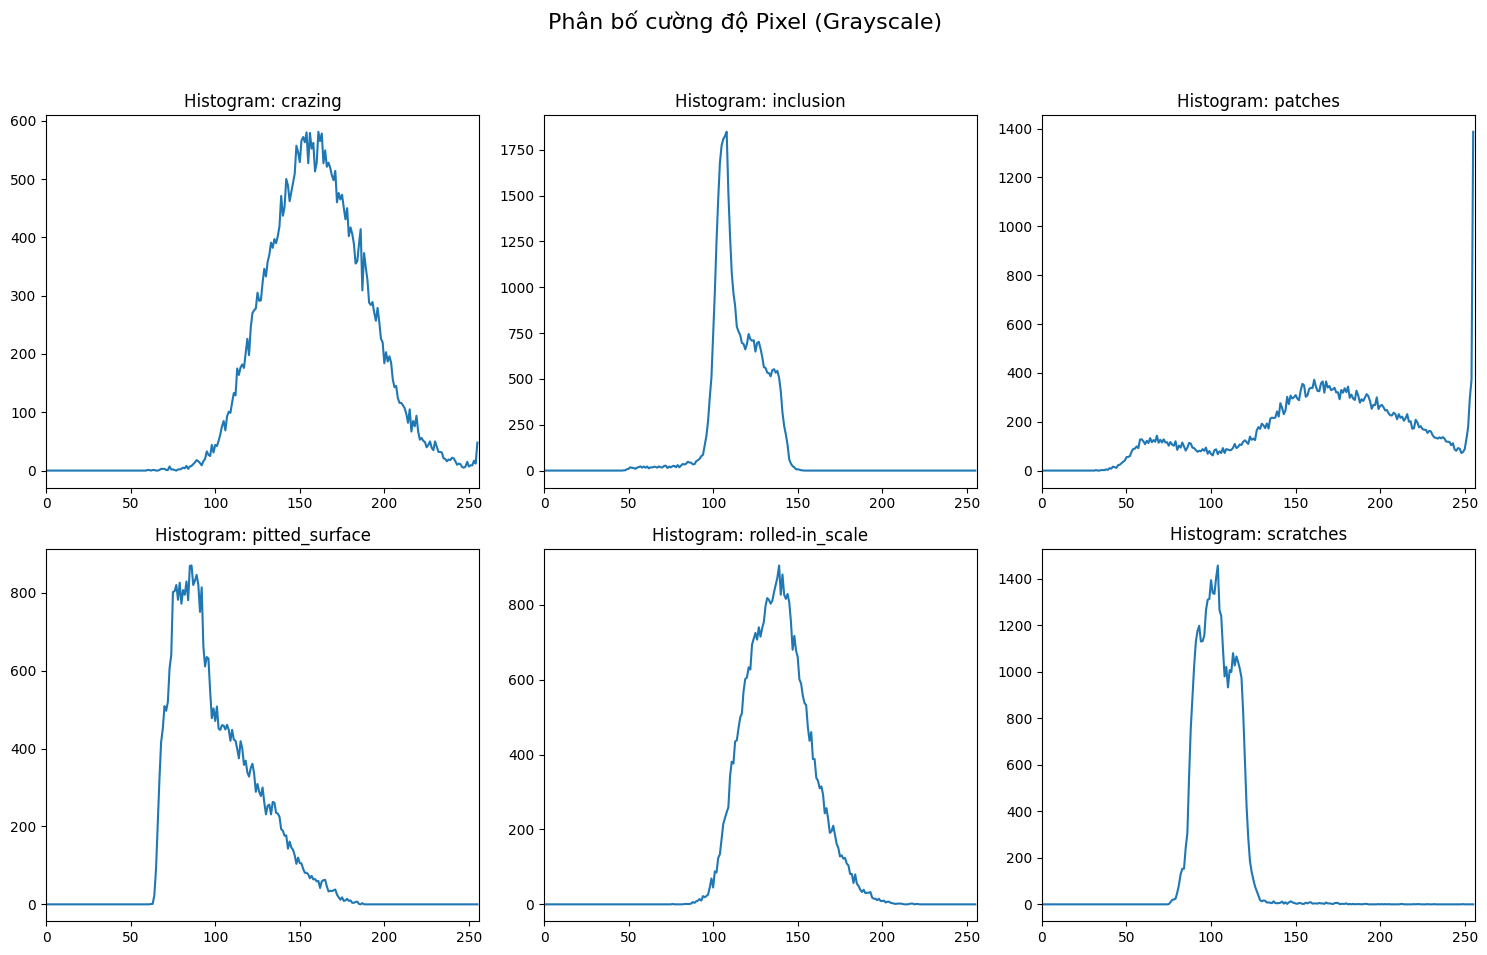

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle("Phân bố cường độ Pixel (Grayscale)", fontsize=16)
for i, (label, path) in enumerate(zip(class_names, sample_paths)):
    gray_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    plt.subplot(2, 3, i + 1)
    plt.plot(hist)
    plt.title(f"Histogram: {label}")
    plt.xlim([0, 256])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()